In [130]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

## Part A

In [131]:
# load the iris dataset
X, y = iris = datasets.load_iris(return_X_y=True)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X[:, :2],
                                                    y,
                                                    test_size=0.5,
                                                    train_size=0.5,
                                                    shuffle=True)

## 1.

We implemented a grid search, taking into account 50 different maximum depths.

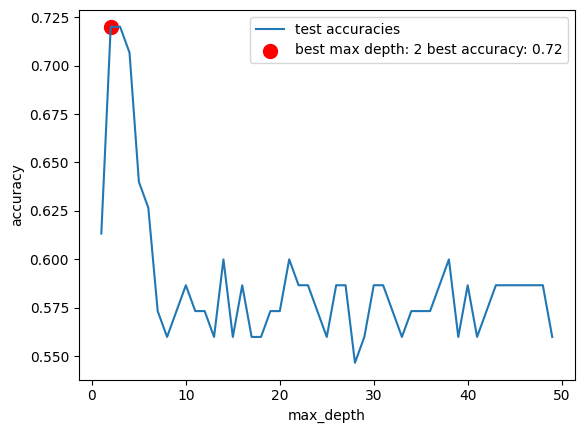

In [132]:
# initialize the decision tree classifier
tree = DecisionTreeClassifier()

# define the depths to be tested
depths = np.arange(1, 50)
param_grid = {'max_depth': depths}

# perform grid search
grid_search = GridSearchCV(DecisionTreeClassifier(),
                           param_grid,
                           scoring='accuracy',
                           cv=5)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_.get('mean_test_score')

# plot the results
best_depth, best_score = depths[np.argmax(scores)], np.max(scores)

plt.plot(depths, scores)
plt.scatter(best_depth, best_score, c='r', s=100)
plt.legend(['test accuracies', f'best max depth: {best_depth} best accuracy: {best_score:.2f}'])
plt.xlabel('max_depth')
plt.ylabel('accuracy')

plt.show()

Training and evaluating the model with the best parameters.

In [133]:
# having the best depth, train the classifier
tree = DecisionTreeClassifier(max_depth=depths[np.argmax(scores)])
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)

# Compute the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Compute the precision of the classifier
precision = precision_score(y_test, y_pred, average='micro')
print("Precision: {:.2f}%".format(precision * 100))

# Compute the recall of the classifier
recall = recall_score(y_test, y_pred, average='micro')
print("Recall: {:.2f}%".format(recall * 100))

Accuracy: 77.33%
Precision: 77.33%
Recall: 77.33%


## 2.

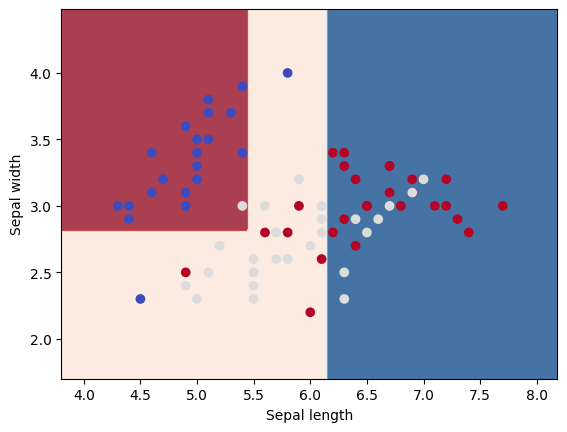

In [134]:
# use the contourf function to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## Part B

In [135]:
class Random_Forest :

    def __init__(self, gamma, n, max_depth):
        # gamma is the fraction of the training set to be used for each tree
        self.gamma = gamma
        # n is the number of trees to be used
        self.n = n
        # max_depth is the maximum depth of each tree
        self.max_depth = max_depth
        # trees is a list of DecisionTreeClassifier objects
        self.trees = []
    
    # in accordance with the sklearn API
    def fit(self, X, y):

        for i in range(self.n):
            # get random indices for each tree
            indices_i = np.random.randint(low=0,
                                          high=X.shape[0],
                                          size=int(self.gamma * X.shape[0]))
            X_i = X[indices_i, :]
            y_i = y[indices_i]

            self.trees.append(DecisionTreeClassifier(max_depth=self.max_depth).fit(X_i, y_i))

    # in accordance with the sklearn API
    def predict(self, X):
        
        # initialize the predictions array
        predictions = np.zeros((X.shape[0], len(self.trees)))

        # get the predictions of each tree
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)
        
        # return the most common prediction for each sample
        return np.array([np.bincount(predictions[i, :].astype(np.int64)).argmax() for i in range(predictions.shape[0])])

    # in accordance with the sklearn API
    def score(self, X, y):
        # return the accuracy of the model
        return accuracy_score(y, self.predict(X))

## 1.

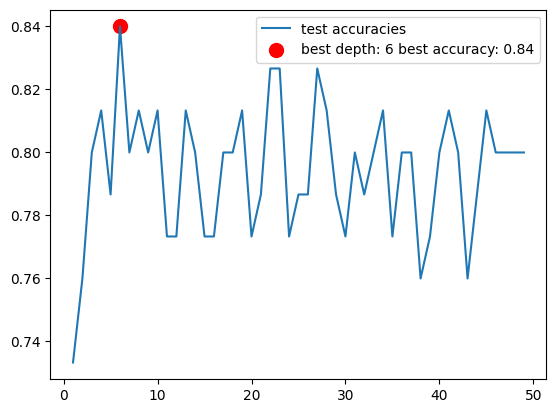

In [136]:
scores = []
# test the model for different depths using a custom grid search
for i in range(1, 50):
    forest = Random_Forest(0.5, 100, i)
    forest.fit(X_train, y_train)
    scores.append(forest.score(X_test, y_test))

# plot the results
plt.plot(depths, scores)
plt.scatter(depths[np.argmax(scores)], np.max(scores), c='r', s=100)
plt.legend(['test accuracies', f'best depth: {depths[np.argmax(scores)]} best accuracy: {np.max(scores):.2f}'])
plt.show()

In [140]:
forest = Random_Forest(0.8, 100, depths[np.argmax(scores)])
forest.fit(X_train, y_train)
forest.score(X_test, y_test)

0.7733333333333333

## 2.

The forest, which uses a ensemble of tree classifiers, has a more complex decision boundary,
with more edges. This makes sense since it uses the input of all those tree classifiers,
requiring more conditions, to make a decision. However throught experimentation we noticed
that the forest classifier can be prone to a small degree of overfitting, as we can see in
the decision boundary plot, in contrast the simple DecisionTreeClassifier.

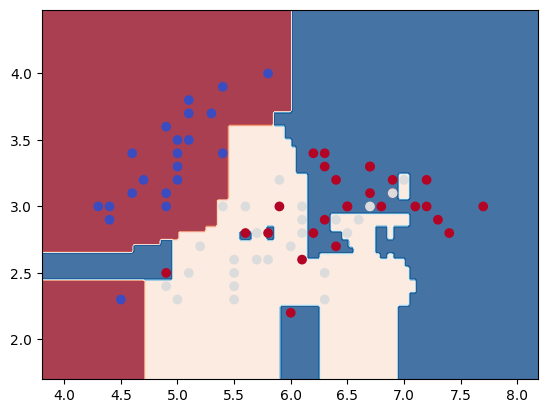

In [141]:
# use the contourf function to plot the decision boundary
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

Z = forest.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='RdBu', alpha=0.8)

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

## 3.

As we can see from the plots, having a gamma above 70% yields the best results.
This makes sense, since each Decision Tree Classifier is trained on a larger portion
of the initial dataset. However the gamma parameter is heavily influenced by the random state.

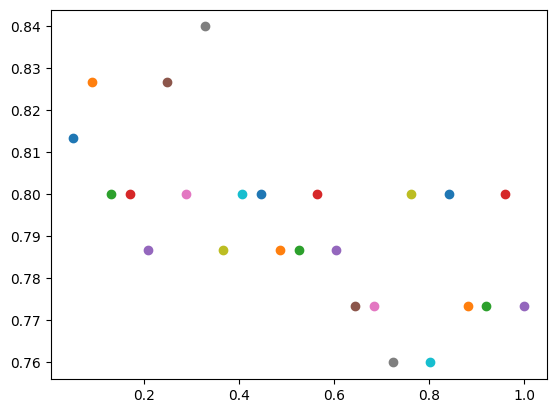

In [139]:
# test the model for different gammas using a custom grid search
gammas = np.linspace(0.05, 1, 25)
for gamma in gammas:
    forest = Random_Forest(gamma, 100, depths[np.argmax(scores)])
    forest.fit(X_train, y_train)
    plt.plot(gamma, forest.score(X_test, y_test), 'o')
plt.show()